In [74]:
# ML libraries required for the Project

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.svm import SVR
from scipy import integrate, optimize

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [75]:
## Importing the Data set ( " Final Canada ")  &  ("c19.csv")

covid = pd.read_csv("./../data/final_canada.csv")
c19 = pd.read_csv("./../data/c19.csv")
c19 = c19[c19['prname'] != 'Canada']
covid["date"] = pd.to_datetime(covid["date"])

In [76]:
#Grouping differnent types of cases as per the date

reqar = ['date','cases','recovered','deaths']

A = covid[reqar[0]]
B = covid[reqar[1]]
C = covid[reqar[2]]
D = covid[reqar[3]]

datewise = pd.concat([A, B, C, D], axis=1, join="inner")
datewise.shape

(451, 4)

In [77]:
# Creating the values of X as the input for ML models
datewise["Days Since"]=np.linspace(0,450,451)

In [78]:
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [79]:
# Implementing the MODELS
# 1. SVR 

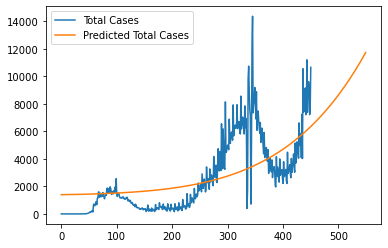

In [80]:
#  SVR Model Implemetation with parameters 
svm = SVR(C=0.000000015,degree=7,kernel='poly',epsilon=0.00005)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["cases"]).reshape(-1,1))
# Predicting the values using the SVR Model
svm_cases = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
# Converting the predicted data to a dataframe
new_date = np.linspace(0,550,551)
new_date=new_date+1
new_prediction_svm=[]
for i in range(0,550):
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns = ["Days","Total Cases"])
model_predictions.head(5)
plt.plot(B,label="Total Cases")
plt.plot(model_predictions['Total Cases'],label="Predicted Total Cases")
plt.legend()

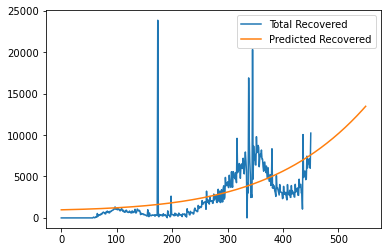

In [81]:
#  SVR Model Implemetation with parameters
svm = SVR(C=0.00000045,degree=6,kernel='poly',epsilon=0.000001)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["recovered"]).reshape(-1,1))
# Predicting the values using the SVR Model
svm_cases = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
# Converting the predicted data to a dataframe
new_date = np.linspace(0,550,551)
new_date=new_date+1
new_prediction_svm=[]
for i in range(0,550):
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns = ["Days","Recovered"])
model_predictions.head(5)
plt.plot(C,label="Total Recovered")
plt.plot(model_predictions['Recovered'],label="Predicted Recovered")
plt.legend()

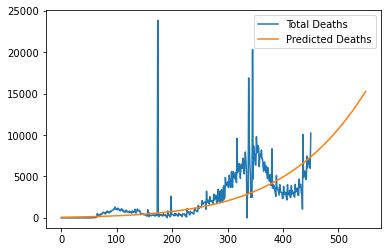

In [82]:
#  SVR Model Implemetation with parameters 
svm = SVR(C=0.00000045,degree=7,kernel='poly',epsilon=0.000001)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["deaths"]).reshape(-1,1))
# Predicting the values using the SVR Model 
svm_cases = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
# Converting the predicted data to a dataframe
new_date = np.linspace(0,550,551)
new_date=new_date+1
new_prediction_svm=[]
for i in range(0,550):
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns = ["Days","Deaths"])
model_predictions.head(5)
plt.plot(C,label="Total Deaths")
plt.plot(model_predictions['Deaths'],label="Predicted Deaths")
plt.legend()

In [83]:
# Model -2   

# 2. Polynomial Regression 

In [84]:
# Importing the dataset
my_file = pd.read_csv('./../data/final_canada.csv')

A1 = my_file["cases"]
B1 = my_file["recovered"]
C1 = my_file["deaths"]
D1 = my_file["active_cases"]

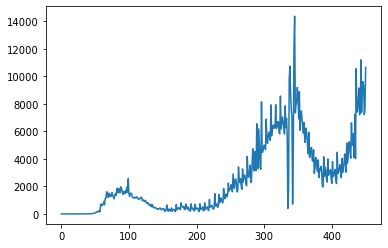

In [85]:
plt.plot(A1)

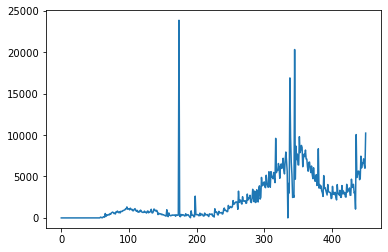

In [86]:
plt.plot(B1)

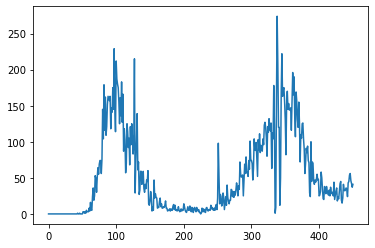

In [87]:
plt.plot(C1)

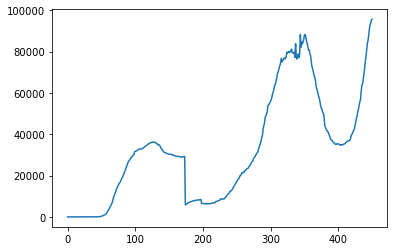

In [88]:
plt.plot(D1)

In [89]:
# Preparing the data for applying  ( Polynomial regression )
# Using the moving average 20 to minimise the noise in the dataset

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

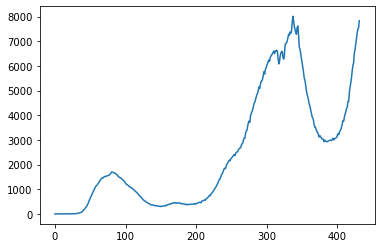

In [90]:
# Preparing the data for applying  ( Polynomial regression )

ma20_A = moving_average(A1,20)
plt.plot(ma20_A)

In [91]:
numbers = np.linspace(1,432,432)
numbers = numbers.reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures

ploy_features = PolynomialFeatures(degree = 22 , include_bias = True)
A_poly = ploy_features.fit_transform(numbers)

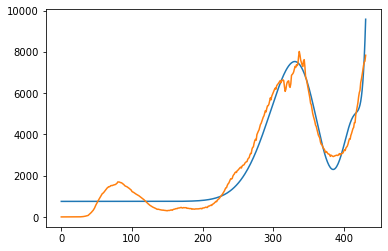

In [92]:
# Fitting the data of  Cases into the polynomial Regression 

from sklearn.linear_model import LinearRegression
lin_reg_A = LinearRegression()

lin_reg_A.fit(A_poly,ma20_A)
A_new = lin_reg_A.predict(A_poly)

plt.plot(A_new)
plt.plot(ma20_A)

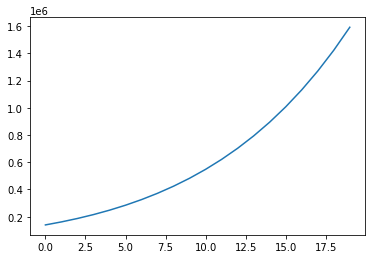

In [93]:
# Plotting the predictions of cases

M = np.linspace(450,470,20)
M = M.reshape(-1,1)
M_poly = ploy_features.fit_transform(M)

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
N = lin_reg_A.predict(M_poly)
plt.plot(N)

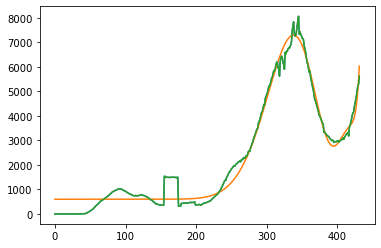

In [94]:
# Preparing the data for applying  ( Polynomial regression )
# Using the moving average 20 to minimise the noise in the dataset

# Fitting the data of Recovered Cases into the polynomial Regression 

ma20_B = moving_average(B1,20)
plt.plot(ma20_B)

B_poly = ploy_features.fit_transform(numbers)

lin_reg2 = LinearRegression()

lin_reg2.fit(B_poly,ma20_B)

B_new = lin_reg2.predict(B_poly)
plt.plot(B_new)
plt.plot(ma20_B)

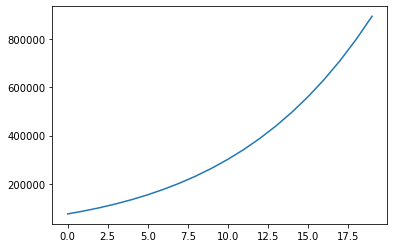

In [95]:
N2 = lin_reg2.predict(M_poly)
plt.plot(N2)

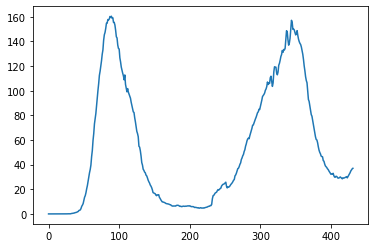

In [96]:
# Visualising the data for Death cases

ma20_C = moving_average(C1,20)
plt.plot(ma20_C)

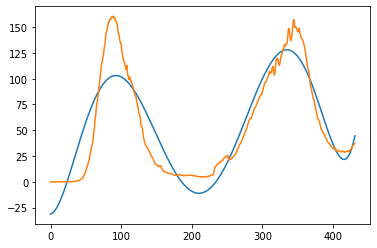

In [97]:
# Preparing the data for applying  ( Polynomial regression )
# Using the moving average 20 to minimise the noise in the dataset
# Fitting the data of Death Cases into the polynomial Regression 

ploy_features_C = PolynomialFeatures(degree = 7 , include_bias = True)
C_poly = ploy_features_C.fit_transform(numbers)

lin_reg3 = LinearRegression()
lin_reg3.fit(C_poly,ma20_C)

C_new = lin_reg3.predict(C_poly)
plt.plot(C_new)
plt.plot(ma20_C)

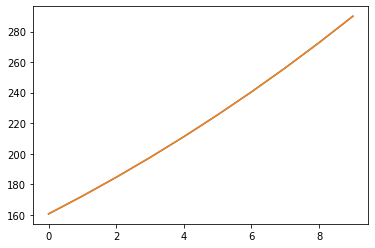

In [98]:
# Predicting the deaths in the upcoming days

M = np.linspace(450,460,10)
M = M.reshape(-1,1)
M_poly = ploy_features_C.fit_transform(M)

N3 = lin_reg3.predict(M_poly)
plt.plot(N3)
N3 = lin_reg3.predict(M_poly)
plt.plot(N3)

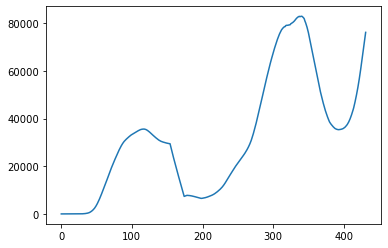

In [99]:
# Visualising the data for Active cases

ma20_D = moving_average(D1,20)
plt.plot(ma20_D)

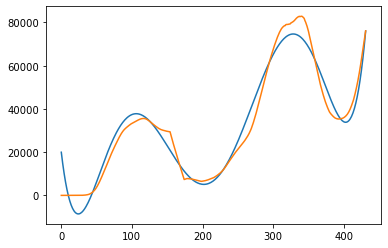

In [100]:
# Preparing the data for applying  ( Polynomial regression )
# Fitting the data of Active Cases into the polynomial Regression 

lin_reg4 = LinearRegression()

ploy_features_D = PolynomialFeatures(degree = 6 , include_bias = True)
D_poly = ploy_features_D.fit_transform(numbers) 

lin_reg4.fit(D_poly,ma20_D)
D_new = lin_reg4.predict(D_poly)

plt.plot(D_new)
plt.plot(ma20_D)

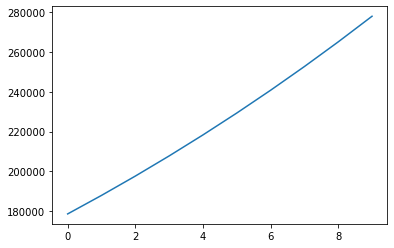

In [101]:
# Plotting the predictions of active cases

k = np.linspace(450,460,10)
k = k.reshape(-1,1)
k_poly = ploy_features_D.fit_transform(M)

N4 = lin_reg4.predict(k_poly)
plt.plot(N4)

In [102]:
#Mathematical Model
#SIR Model
canada_df=pd.read_csv("./../data/final_canada.csv")
canada_df.columns
canada_df

,day,date,cases,cumulative_cases,recovered,cumulative_recovered,deaths,cumulative_deaths,active_cases
0,0,25-01-2020,1,1,0,0,0,0,1
1,1,26-01-2020,0,1,0,0,0,0,1
2,2,27-01-2020,1,2,0,0,0,0,2
3,3,28-01-2020,1,3,0,0,0,0,3
4,4,29-01-2020,0,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
446,446,15-04-2021,9612,1104356,6567,990079,56,23486,90791
447,447,16-04-2021,9309,1113665,7128,997207,46,23532,92926
448,448,17-04-2021,7210,1120875,6351,1003558,42,23574,93743
449,449,18-04-2021,7646,1128521,5994,1009552,37,23611,95358


In [103]:
#SIR model
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

def SIR(N, b0, beta, gamma, hs):
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

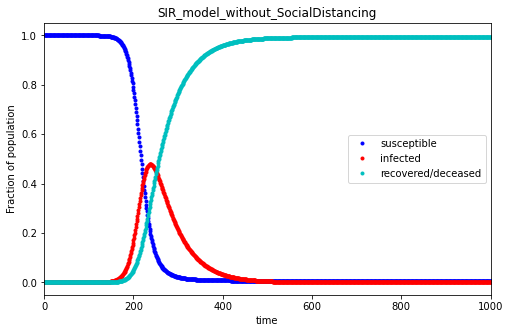

In [104]:
# Parameters of the model
#Analyzing Social Distance usage
N = 3800 * 10000
b0 = 0
beta = 1
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR_model_without_SocialDistancing")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_without_SocialDistancing.png')
plt.show()

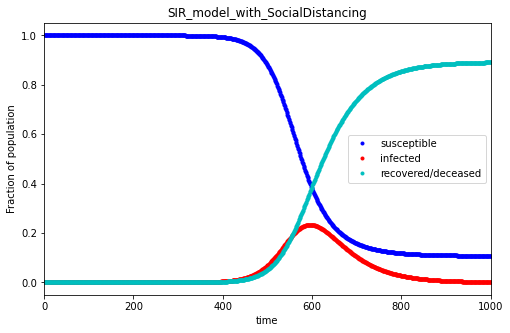

In [105]:
# Parameters of the model
import matplotlib.pyplot as plt
N = 3800 * 10000
b0 = 0
beta = 0.5
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR_model_with_SocialDistancing")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_with_SocialDistancing.png')
plt.show()

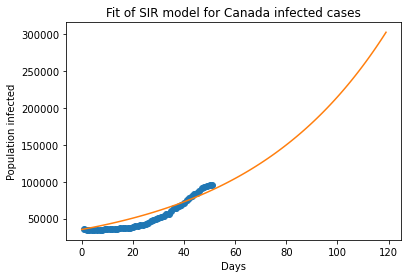

Optimal parameters: beta = 0.018110274477135997  and gamma =  9.08585187528156e-14


In [106]:
population = float(38100000)
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = canada_df.iloc[400:,8]
country_df['day_count'] = list(range(1,len(country_df)+1))
ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0
#print(inf0,sus0,rec0)
def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]
param_bounds=([0,0],[4,4])
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,bounds=param_bounds)
fitted = fit_odeint(list(range(120)), *popt)
plt.plot(xdata, ydata, 'o')
plt.plot(list(range(120)), fitted)
plt.title("Fit of SIR model for Canada infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
#list(range(400))

In [107]:
#fully Vaccinated percentage date Prediction
admin=pd.read_csv("./../data/vaccine_administration_timeseries_canada.csv")
distr=pd.read_csv("./../data/vaccine_distribution_timeseries_canada.csv")
comple=pd.read_csv("./../data/vaccine_completion_timeseries_canada.csv")
admin=admin.rename(columns={'date_vaccine_administered':'date'})
distr=distr.rename(columns={'date_vaccine_distributed':'date'})
comple=comple.rename(columns={'date_vaccine_completed':'date'})

In [108]:
one=pd.merge(admin,distr,on="date",how='outer')
cases=pd.merge(one,comple,on="date",how='outer')
vaccine=cases[['date','avaccine','dvaccine','cvaccine','cumulative_avaccine', 'cumulative_dvaccine','cumulative_cvaccine']]
vaccine=vaccine.fillna(0)
vaccine=vaccine.iloc[0:127,:]
#vaccine
vaccine.avaccine=vaccine.avaccine.astype('int64')
vaccine.dvaccine=vaccine.dvaccine.astype('int64')
vaccine.cvaccine=vaccine.cvaccine.astype('int64')
vaccine.cumulative_avaccine=vaccine.cumulative_avaccine.astype('int64')
vaccine.cumulative_dvaccine=vaccine.cumulative_dvaccine.astype('int64')
vaccine.cumulative_cvaccine=vaccine.cumulative_cvaccine.astype('int64')
#vaccine

In [109]:
admin_prov=pd.read_csv("./../data/vaccine_administration_timeseries_prov.csv")
distr_prov=pd.read_csv("./../data/vaccine_distribution_timeseries_prov.csv")
comple_prov=pd.read_csv("./../data/vaccine_completion_timeseries_prov.csv")
admin_prov=admin_prov.rename(columns={'date_vaccine_administered':'date'})
distr_prov=distr_prov.rename(columns={'date_vaccine_distributed':'date'})
comple_prov=comple_prov.rename(columns={'date_vaccine_completed':'date'})

In [110]:
one=pd.merge(admin_prov,distr_prov,on=["date",'province'], how='outer')
cases=pd.merge(one,comple_prov,on=["date",'province'],how='outer')
vaccine_prov=cases[['province','date','avaccine','dvaccine','cvaccine','cumulative_avaccine', 'cumulative_dvaccine','cumulative_cvaccine']]
vaccine_prov=vaccine_prov.fillna(0)
vaccine_prov=vaccine_prov.iloc[0:1651,:]
#vaccine
vaccine_prov.avaccine=vaccine_prov.avaccine.astype('int64')
vaccine_prov.dvaccine=vaccine_prov.dvaccine.astype('int64')
vaccine_prov.cvaccine=vaccine_prov.cvaccine.astype('int64')
vaccine_prov.cumulative_avaccine=vaccine_prov.cumulative_avaccine.astype('int64')
vaccine_prov.cumulative_dvaccine=vaccine_prov.cumulative_dvaccine.astype('int64')
vaccine_prov.cumulative_cvaccine=vaccine_prov.cumulative_cvaccine.astype('int64')
#vaccine_prov

In [111]:
def moving_average(name, window_size):
    data=vaccine_prov[vaccine_prov.province==name].avaccine
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return np.mean(moving_average[113:127])
def moving_average2(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return np.mean(moving_average[113:127])
avg=moving_average2(vaccine['avaccine'],7)


In [112]:
vaccine_2=vaccine_prov[vaccine_prov.date=='19-04-2021'].loc[:,['province','cumulative_avaccine']].copy()
rolling_avg=[moving_average(x,7) for x in vaccine_2.province]
rolling_avg=np.array(rolling_avg)
vaccine_2['rolling_7day_avg']=rolling_avg
vaccine_2['population']=np.array([4371316,5071336,1369465,776827,521542,971395,38780,44826,14566547,156947,8484965,1174462,40854])
vaccine_2.loc[len(vaccine.index)] = ['Canada',10243418, avg,vaccine_2.population.sum()] 
vaccine_2=vaccine_2.reset_index()
vaccine_2=vaccine_2.drop(['index'],axis=1)

In [113]:
import math
percentage=[60,70,80,90]
list1=[]
for i in percentage:
    list2=[]
    for j in range(14):
        vaccine_req=[i*vaccine_2.iloc[j,3]*0.02]-vaccine_2.iloc[j,1]
        days_req=vaccine_req/vaccine_2.iloc[j,2]
        list2.append(math.ceil(days_req[0]))
    list1.append(list2)

from datetime import timedelta, datetime
def extend_date(index, new_size):
    current = datetime.strptime(index, '%d-%m-%Y')
    #print(current)
    i=0
    while i < new_size:
        current = current + timedelta(days=1)
        i=i+1
    values =datetime.strftime(current, '%d-%m-%Y')
   # print(values)
    return values
index='19-04-2021'

In [114]:
ans=[]
for i in list1:
    arr=[]
    for j in i:
        j=extend_date(index,j)
        arr.append(j)
    ans.append(np.array(arr))

In [115]:
vaccine_2['expected day to reach 60% fully vaccinated']=ans[0]
vaccine_2['expected day to reach 70% fully vaccinated']=ans[1]
vaccine_2['expected day to reach 80% fully vaccinated']=ans[2]
vaccine_2['expected day to reach 90% fully vaccinated']=ans[3]
vaccine_2

,province,cumulative_avaccine,rolling_7day_avg,population,expected day to reach 60% fully vaccinated,expected day to reach 70% fully vaccinated,expected day to reach 80% fully vaccinated,expected day to reach 90% fully vaccinated
0,Alberta,1165223,32755,4371316,22-08-2021,18-09-2021,14-10-2021,10-11-2021
1,BC,1380160,41185,5071336,12-08-2021,05-09-2021,30-09-2021,25-10-2021
2,Manitoba,341926,8660,1369465,17-09-2021,18-10-2021,19-11-2021,21-12-2021
3,New Brunswick,200587,5695,776827,26-08-2021,22-09-2021,20-10-2021,16-11-2021
4,NL,136349,4319,521542,11-08-2021,04-09-2021,28-09-2021,22-10-2021
5,Nova Scotia,207563,7373,971395,27-08-2021,23-09-2021,19-10-2021,15-11-2021
6,Nunavut,25188,296,38780,01-07-2021,27-07-2021,22-08-2021,17-09-2021
7,NWT,44646,833,44826,30-04-2021,11-05-2021,22-05-2021,02-06-2021
8,Ontario,3904778,93744,14566547,11-09-2021,12-10-2021,12-11-2021,14-12-2021
9,PEI,39504,768,156947,30-10-2021,10-12-2021,20-01-2022,02-03-2022
